# Google Sheets + Python using Gspread Module 🚀

--------



In [1]:
# Import modules 

import gspread #pip install gspread
import pandas as pd

In [ ]:
# Setting up with the connection
# The json file downloaded needs to be in the same folder
cred_file = "json file"
gc = gspread.service_account(cred_file)
gc

In [52]:
# Establish the connection
# database is the googleSpreadSheet name
database = gc.open("Costo Materia Prima")


In [53]:
# Selecting a worksheet
wks = database.worksheet("Materia Prima")
wks

<Worksheet 'Materia Prima' id:1887921454>

In [ ]:
# List all the worksheets
list_wks = database.worksheets()
list_wks

In [ ]:
# Adding a new worksheet to Google SpreadSheet
database.add_worksheet("new_wks","100","20")

In [ ]:
# Fetching the url of the of the SpreadSheet 
database.url

In [55]:
# Acess all the records
data = pd.DataFrame(wks.get_all_records())
data

,ARTICULO,PRECIO
0,Adhesivo/Neoprene,21000
1,Adhesivo/PU,20000
2,Caucho 3 mm Nacional - Med:,0
3,Caucho 3 mm Nacional - Med:,0
4,Caucho 5 mm Nacional - Med:,0
5,Eva 30 mm S/C - Med:,0
6,Eva 30 mm S/C - Med:,5320
7,Eva 5 mm P/Plant - Med: 5,0
8,Eva Ruta - Med:,0
9,Folia Cambrada,120


<AxesSubplot: ylabel='ARTICULO'>

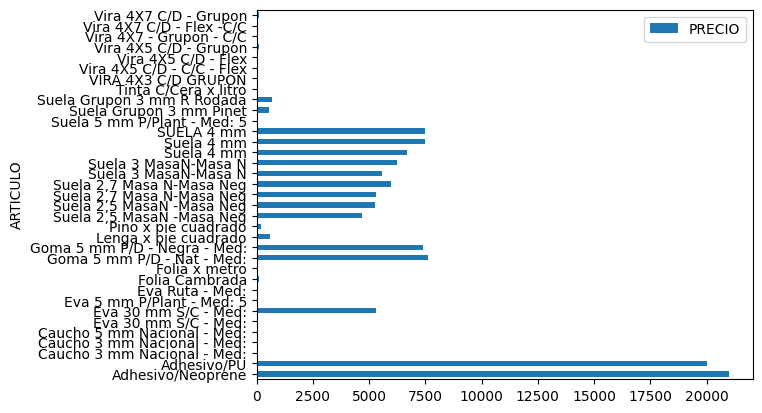

In [56]:
# Plotting
data.plot.barh(x="ARTICULO",y="PRECIO")

In [ ]:
# Finding a Keyword from our Selected Worksheet

# -----
# Selecting a worksheet
#wks = database.worksheet("Sheet1")
#wks

# ----

word = "Adhesivo/PU"
cell = wks.find(word)
cell
key_row = cell.row
key_col = cell.col
print(key_col,key_row)

In [ ]:
# Obtaining the value
wks.cell(3,1).value

In [ ]:
# Total number of row
n = wks.col_values(2) # Gives all the rows as list in column 2
len(n)

In [ ]:
# Update a new cell from the 
new_name = "Suela"
new_price = 27

wks.update_cell(23,1,new_name)
wks.update_cell(23,2,new_age)

In [ ]:
# Update batch of cells 

cell_list = wks.range('B24:B28')
cell_values = [20,24,25,26]

for i, val in enumerate(cell_values): #gives us a tuple of an index and value
    cell_list[i].value = val # use the index on cell_list and the val from cell_values

    
wks.update_cells(cell_list)